In [1]:
import numpy as np
import matplotlib.pyplot as plt

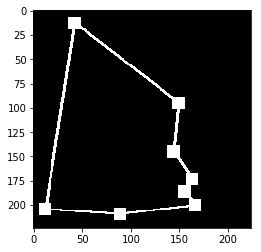

In [2]:
# 读取并展示要后处理的数据
# 城市数目
NUM_CITY=8
# 路径图像 
path_image=np.load("demo_path.npy")
# 城市坐标
city_site=np.array([[ 13,  42],
                   [ 95, 149],
                   [145, 144],
                   [173, 163],
                   [186, 155],
                   [200, 166],
                   [204,  12],
                   [209,  89]])
# 展示路径图像 背景位置数值为0 路径为1
plt.imshow(path_image,cmap=plt.cm.gray)
plt.show()

In [3]:
# 函数：生成单个线条是最优路径的概率值
def line(startx,starty,endx,endy,path_image):
    # startx 和 starty 是线条出发点的横纵坐标
    # endx 和 endy 是线条到达点的横纵坐标
    # path_image 是路径图像
    n1=abs(endx-startx)
    n2=abs(endy-starty)
    n=max(n1,n2) # 路径像素点总数
    coincide=0 #重合次数
    if n==n1:
        if startx >= endx:
                for x in range(endx,startx):
                        y=int((x-startx)*(endy-starty)/(endx-startx))+starty
                        # 注：额外判断线条上下一个像素点，可以增加准确率
                        if path_image[x,y]==1 or path_image[x,y+1]==1 or path_image[x,y-1]==1:
                            coincide=coincide+1
        else:
                for x in range(startx,endx):
                        y=int((x-startx)*(endy-starty)/(endx-startx))+starty
                        if path_image[x,y]==1 or path_image[x,y+1]==1 or path_image[x,y-1]==1:
                            coincide=coincide+1
    if n==n2 and n!=n1:
        if starty >= endy:
                for y in range(endy,starty):
                        x=int((y-starty)*(endx-startx)/(endy-starty))+startx
                        if path_image[x,y]==1 or path_image[x-1,y]==1 or path_image[x+1,y]==1:
                            coincide=coincide+1
        else:
                for y in range(starty,endy):
                        x=int((y-starty)*(endx-startx)/(endy-starty))+startx
                        if path_image[x,y]==1 or path_image[x-1,y]==1 or path_image[x+1,y]==1:
                            coincide=coincide+1
        
    return coincide/n # 返回 重合次数/路径像素点总数

In [4]:
# 函数测试： 第一个城市与第二个城市之间连线的概率值
line(13,42,95,149,path_image)

1.0

In [5]:
# 函数 生成所有城市之间连线的概率值
def belief_value(city_site,path_image):
    # 输入城市坐标 与 路径图像
    A=np.zeros([NUM_CITY,NUM_CITY]) # 邻接矩阵
    # 对于A逐行逐列生成连线概率值,计算上三角矩阵
    for row in range(NUM_CITY-1):
        for col in range(row+1,NUM_CITY):
            A[row,col]=line(city_site[row,0],city_site[row,1],city_site[col,0],city_site[col,1],path_image)
    # 下三角矩阵采用上三角矩阵转置生成
    for row in range(NUM_CITY):
        for col in range(row,NUM_CITY):
            A[col,row]=A[row,col]
    return A

In [6]:
# 测试函数
A=belief_value(city_site,path_image)
# 出现小数点的原因是城市坐标位置的像素被记入了路径的概率值
# 如果输出图像中区分城市和路径可以避免这个问题
print(A)

[[0.         1.         0.09848485 0.2375     0.07514451 0.14438503
  1.         0.07653061]
 [1.         0.         1.         0.25641026 0.42857143 0.37142857
  0.09489051 0.11403509]
 [0.09848485 1.         0.         1.         0.31707317 0.58181818
  0.09848485 0.203125  ]
 [0.2375     0.25641026 1.         0.         1.         0.48148148
  0.08609272 0.2027027 ]
 [0.07514451 0.42857143 0.31707317 1.         0.         1.
  0.0979021  0.21212121]
 [0.14438503 0.37142857 0.58181818 0.48148148 1.         0.
  0.27922078 1.        ]
 [1.         0.09489051 0.09848485 0.08609272 0.0979021  0.27922078
  0.         1.        ]
 [0.07653061 0.11403509 0.203125   0.2027027  0.21212121 1.
  1.         0.        ]]


In [7]:
# 生成城市搜索次序表
City_order=np.arange(NUM_CITY)
# 以A中第0行出发，找出下一个城市
Next_City=0
print("出 发 城 市:",city_site[Next_City])
for search_city in range(1,NUM_CITY):
    # 将已经经过的城市从搜索次序表中剔除
    City_order=City_order[np.where(City_order!=Next_City)]
    
    # 在未经过的城市之中搜索
    biggest_prob=0
    for i in range(NUM_CITY):
        if i in City_order and A[Next_City,i]>biggest_prob:
            biggest_prob=A[Next_City,i]
            Next_City=i
    print("第",search_city,"个城市:",end=" ")
    print(city_site[Next_City])
print("返 回 城 市:",city_site[0])

出 发 城 市: [13 42]
第 1 个城市: [ 95 149]
第 2 个城市: [145 144]
第 3 个城市: [173 163]
第 4 个城市: [186 155]
第 5 个城市: [200 166]
第 6 个城市: [209  89]
第 7 个城市: [204  12]
返 回 城 市: [13 42]


注：为确保可行解 被经过的城市要被剔除搜索列表 且搜索完毕后强制返回出发城市